# ***This Code is prepared by Afshin Marani and Zahra Mohammadi for Group 13***

# Machine Learning Avenues in Solving Partial Differential Equations (PDEs)

# Case Study 1: Solution of A Theoritical PDE: Heat Transfer Equation

Importing the required built-in libraries for data preprocessing, data visualization, algorithm implementation, and error metrics

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import os
import glob


Importing and preprocessing the dataset

In [3]:
os.chdir('C:/Users/Afshin/Desktop/Temp. Needed/UWO/Winter Semester/ECE 9309/Project/U10')
extension = 'xlsx'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]


In [4]:
all_filenames

['data10.xlsx', 'data10B.xlsx']

In [5]:
all_data = pd.DataFrame()
for f in all_filenames:
    df = pd.read_excel(f, dtype='float64')
    all_data = all_data.append(df,ignore_index=False, sort=False)

In [6]:
# Size of uncleaned dataset
print('The size of imported dataset is:', all_data.shape)
all_data

The size of imported dataset is: (1076357, 7)


,x,y,t (time),Tint,T (output),Unnamed: 5,Unnamed: 6
0,0.000000,0.000000,0.0,10.0,5.000000,NaN,NaN
1,1.000000,0.000000,0.0,10.0,0.000000,NaN,NaN
2,1.000000,1.000000,0.0,10.0,0.000000,NaN,NaN
3,0.000000,1.000000,0.0,10.0,5.000000,NaN,NaN
4,0.100000,0.000000,0.0,10.0,0.000000,NaN,NaN
5,0.200000,0.000000,0.0,10.0,0.000000,NaN,NaN
6,0.300000,0.000000,0.0,10.0,0.000000,NaN,NaN
7,0.400000,0.000000,0.0,10.0,0.000000,NaN,NaN
8,0.500000,0.000000,0.0,10.0,0.000000,NaN,NaN
9,0.600000,0.000000,0.0,10.0,0.000000,NaN,NaN


Dropping Extra columns from dataset

In [7]:
all_data=all_data.drop('Unnamed: 5', axis=1)
all_data=all_data.drop('Unnamed: 6', axis=1)

In [8]:
# Size of cleaned dataset
print('The size of cleaned dataset is:', all_data.shape)
all_data

The size of cleaned dataset is: (1076357, 5)


,x,y,t (time),Tint,T (output)
0,0.000000,0.000000,0.0,10.0,5.000000
1,1.000000,0.000000,0.0,10.0,0.000000
2,1.000000,1.000000,0.0,10.0,0.000000
3,0.000000,1.000000,0.0,10.0,5.000000
4,0.100000,0.000000,0.0,10.0,0.000000
5,0.200000,0.000000,0.0,10.0,0.000000
6,0.300000,0.000000,0.0,10.0,0.000000
7,0.400000,0.000000,0.0,10.0,0.000000
8,0.500000,0.000000,0.0,10.0,0.000000
9,0.600000,0.000000,0.0,10.0,0.000000


Now, we check for any missing value

In [9]:
#checking for missing value
print ('Missing Values:')
print (all_data.isnull().sum())

Missing Values:
x             0
y             0
t (time)      0
Tint          0
T (output)    0
dtype: int64


Now, we change the names of the features for convenience purpose, and also fill the missing values

In [10]:
#Changing the label of features for convenience in coding process and filling the missing value
all_data=all_data.rename(columns={'T (output)': 'Tout'})
#data=all_data.fillna(method='bfill')
data=all_data.fillna(method='ffill')
print('The size of cleaned dataset is:', all_data.shape)
print ('Missing Values:')
print(data.isnull().sum())
data

The size of cleaned dataset is: (1076357, 5)
Missing Values:
x           0
y           0
t (time)    0
Tint        0
Tout        0
dtype: int64


,x,y,t (time),Tint,Tout
0,0.000000,0.000000,0.0,10.0,5.000000
1,1.000000,0.000000,0.0,10.0,0.000000
2,1.000000,1.000000,0.0,10.0,0.000000
3,0.000000,1.000000,0.0,10.0,5.000000
4,0.100000,0.000000,0.0,10.0,0.000000
5,0.200000,0.000000,0.0,10.0,0.000000
6,0.300000,0.000000,0.0,10.0,0.000000
7,0.400000,0.000000,0.0,10.0,0.000000
8,0.500000,0.000000,0.0,10.0,0.000000
9,0.600000,0.000000,0.0,10.0,0.000000


In the next step, we define the input and output of the model

In [11]:
Output= data.Tout
Input = data.drop('Tout', axis=1)
X=Input
y=Output

In [12]:
# Description of data
des=data.describe()
description=pd.DataFrame(des)
description

,x,y,t (time),Tint,Tout
count,1.076357e+06,1.076357e+06,1.076357e+06,1076357.0,1.076357e+06
mean,4.943179e-01,4.980438e-01,5.000000e-01,10.0,2.342478e+00
std,2.847715e-01,2.867395e-01,2.915477e-01,0.0,2.597620e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,10.0,0.000000e+00
25%,2.615404e-01,2.601272e-01,2.500000e-01,10.0,3.242525e-01
50%,4.820711e-01,4.947554e-01,5.000000e-01,10.0,1.286187e+00
75%,7.329717e-01,7.385853e-01,7.500000e-01,10.0,3.601475e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,10.0,1.000000e+01


Data information

In [13]:
# Data information
inf=data.info()
inf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076357 entries, 0 to 543506
Data columns (total 5 columns):
x           1076357 non-null float64
y           1076357 non-null float64
t (time)    1076357 non-null float64
Tint        1076357 non-null float64
Tout        1076357 non-null float64
dtypes: float64(5)
memory usage: 49.3 MB


To have a better insight into the dataset, we perform a data exploration on the dataset

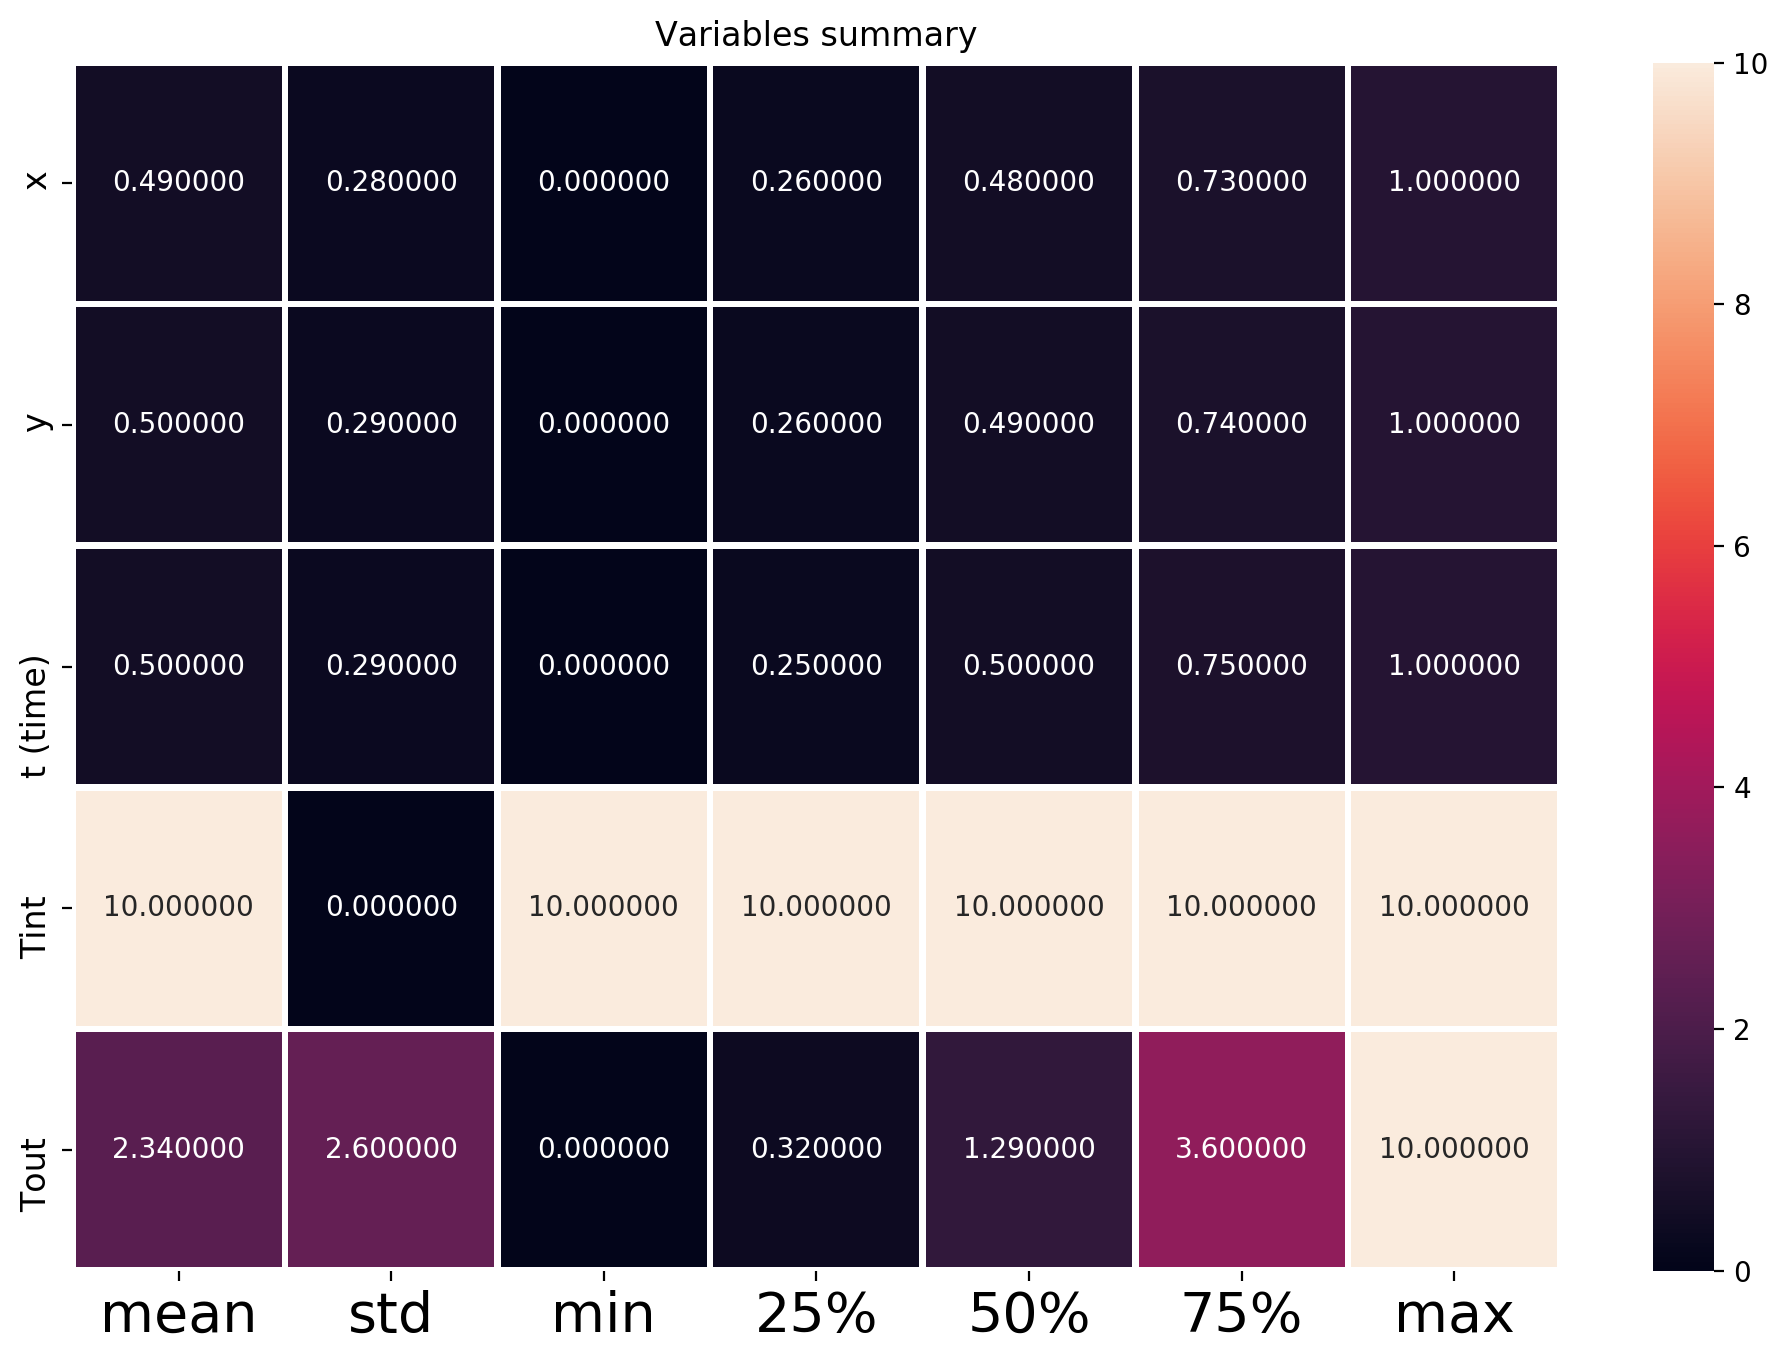

Correlation:


,x,y,t (time),Tint,Tout
x,1.000000e+00,-5.132073e-03,-2.756025e-18,NaN,-0.809561
y,-5.132073e-03,1.000000e+00,2.935602e-18,NaN,0.027280
t (time),-2.756025e-18,2.935602e-18,1.000000e+00,NaN,0.105848
Tint,NaN,NaN,NaN,NaN,NaN
Tout,-8.095612e-01,2.728046e-02,1.058481e-01,NaN,1.000000


In [14]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

print('Correlation:')

data.corr(method='pearson')


Pair Plot:


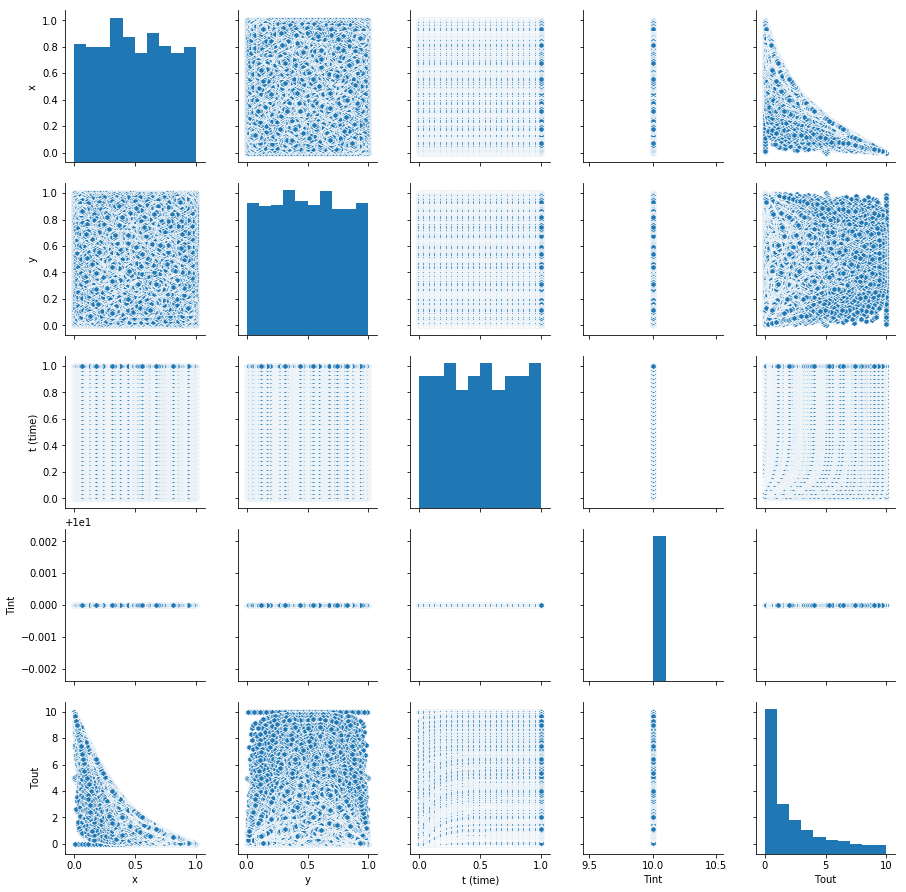

<Figure size 3600x3600 with 0 Axes>

In [14]:
# Pair plot between variables
sns.pairplot(data,markers="h")
print('Pair Plot:')
plt.figure(dpi=300, figsize=(12,12))
plt.show()



In this stage, we split the data into training and testing subsets (30 % of the data is allocated for testing)

In [15]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=0)

For convenience, a function is defined to run the model and print the associated error using different error metrics

In [21]:
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    RMSE=np.sqrt(mean_squared_error(dtesty,prediction))
    MAE=mean_absolute_error(dtesty, prediction)
    MSE = metrics.mean_squared_error(y_test, prediction)
    print ("MEAN SQUARED ERROR (MSE) :", MSE )   
    print ("***************************************************************************")
    print ("ROOT MEAN SQUARED ERROR (RMSE) :", RMSE )
    print ("***************************************************************************")

    
    print ("MAE is: ", MAE )
    print ("***************************************************************************")

    
    print ("R-Squared is: ", r2_score(dtesty, prediction) )
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)


import warnings
warnings.filterwarnings("ignore")

Now, we run the desired regression algorithm. Here, gradient boosting regression is used.

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_features= 2, min_samples_split= 4, min_samples_leaf=2, random_state=0, warm_start=True, verbose=1)
model(gbr,X_train,y_train,X_test,y_test,"feat")
prediction_test = gbr.predict(X_test)
prediction_train=gbr.predict(X_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='ls', max_depth=3, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=0,
             subsample=1.0, verbose=1, warm_start=True)
***************************************************************************
      Iter       Train Loss   Remaining Time 
         1           3.2046            1.86m
         2           2.6411            1.89m
         3           1.6630            1.96m
         4           0.9746            2.03m
         5           0.7184            2.03m
         6           0.5740            2.00m
         7           0.5210            1.97m
         8           0.4207            1.98m
         9           0.3891            2.00m
        10           0.34

Now, we visualize the temperature of the train points in the given domain based on the real observations and the predictions

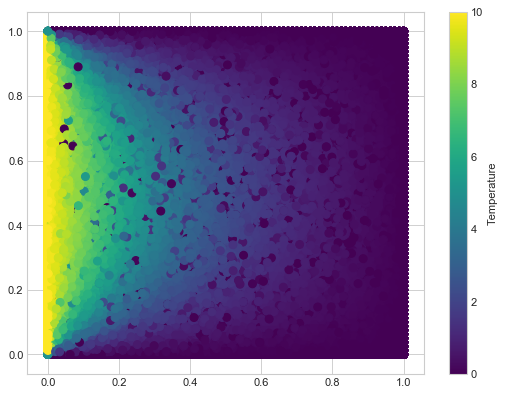

In [38]:
# plot of the temperature of the points using real observations from the dataset
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
plt.scatter(X_train.x, X_train.y, c=y_train, s=50, cmap='viridis')
lab = plt.colorbar()
lab.set_label("Temperature")

In [39]:
p2=pd.DataFrame({'y_pred': prediction_train})


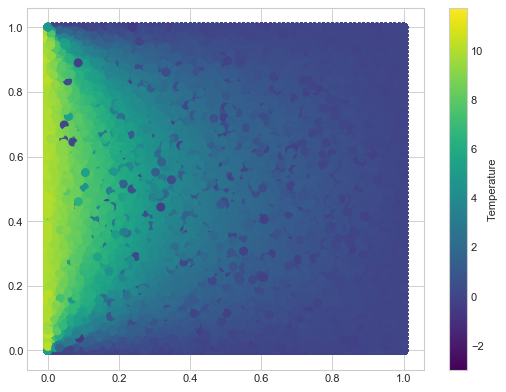

In [40]:
# plot of the temperature of the points using prediction from GBR model
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
plt.scatter(X_train.x, X_train.y, c=p2.y_pred, s=50, cmap='viridis')
lab = plt.colorbar()
lab.set_label("Temperature")

In [41]:
diff=y_train - prediction_train
p3=pd.DataFrame({'diffe': diff}, dtype='float64')


Plot the error (the difference between observed and predicted values of temperature)

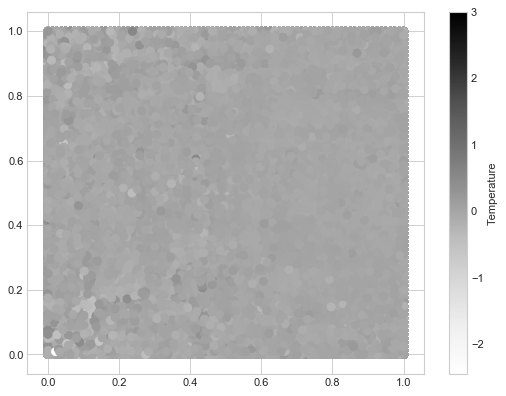

In [42]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
plt.scatter(X_train.x, X_train.y, c=p3.diffe, s=50, cmap='Greys')
lab = plt.colorbar()
lab.set_label("Temperature")


In [43]:
estimation_cs = pd.DataFrame({'Actual T': y_test, 'Estimated T':prediction_test})
estimation_cs.head(40)

,Actual T,Estimated T
47344,0.000384,-0.017625
3222,0.000000,-1.184598
337802,1.715373,1.674351
381533,0.818806,0.774494
203321,1.732416,1.508902
434684,2.113126,2.131321
196290,1.266861,1.109865
229563,1.472796,1.486973
188481,0.345844,0.354576
442260,0.906081,0.844075


In [44]:
estimation_cs = pd.DataFrame({'Actual T': y_train, 'Estimated T':prediction_train})
estimation_cs.head(120)

,Actual T,Estimated T
356116,1.985839,1.884509
118290,3.416209,3.288193
301161,0.000000,-0.012893
104265,1.543858,1.444264
394250,0.812371,0.804101
115968,1.183927,1.197080
433639,0.766018,0.656743
214959,0.628000,0.615563
265343,1.705487,1.666011
178606,0.021044,-0.000935


Now, we use YellowBrick visualization class for better presentation of the results 

      Iter       Train Loss   Remaining Time 


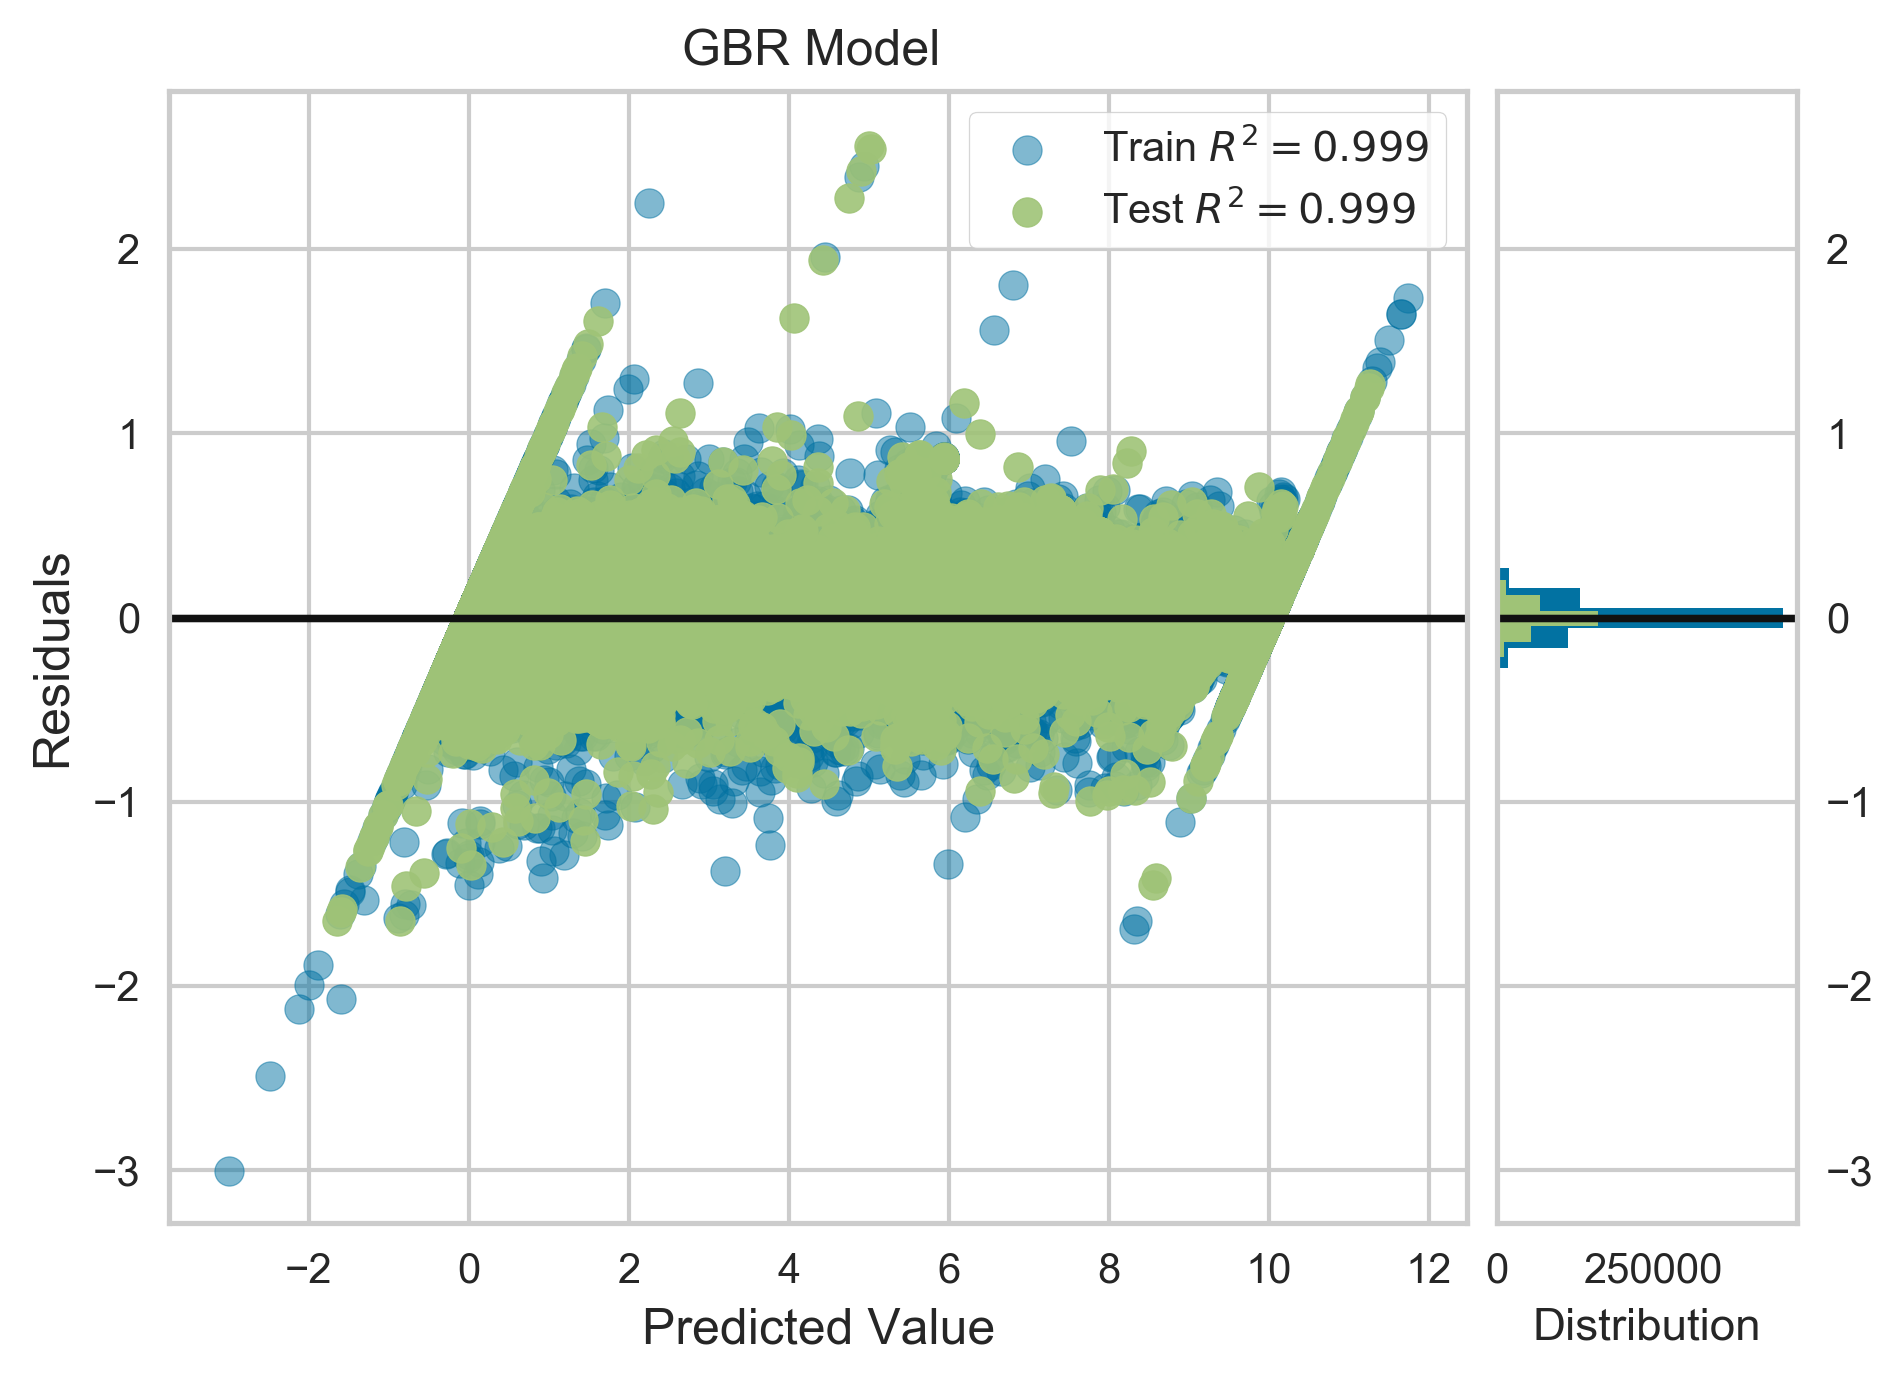

In [50]:
#Yellowbrick
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
from yellowbrick.contrib.scatter import ScatterVisualizer
plt.rcParams[('figure.figsize')]=(7,5)
plt.rcParams[('figure.dpi')]=300
my_title="GBR Model "


visualizer = ResidualsPlot(gbr, title=my_title, alpha=0.1)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
# Call finalize to draw the final yellowbrick-specific elements
visualizer.finalize()
visualizer.ax.set_xlabel("Observed/Predicted Concrete Strength (MPa)", fontsize=12)
visualizer.ax.set_ylabel("Residuals (MPa)", fontsize=12)
visualizer.ax.tick_params(axis='both', labelsize=10)
g = visualizer.poof(alpha=0.1)             # Draw/show/poof the data

      Iter       Train Loss   Remaining Time 


Text(0,0.5,'Predicted Compressive Strength (MPa)')

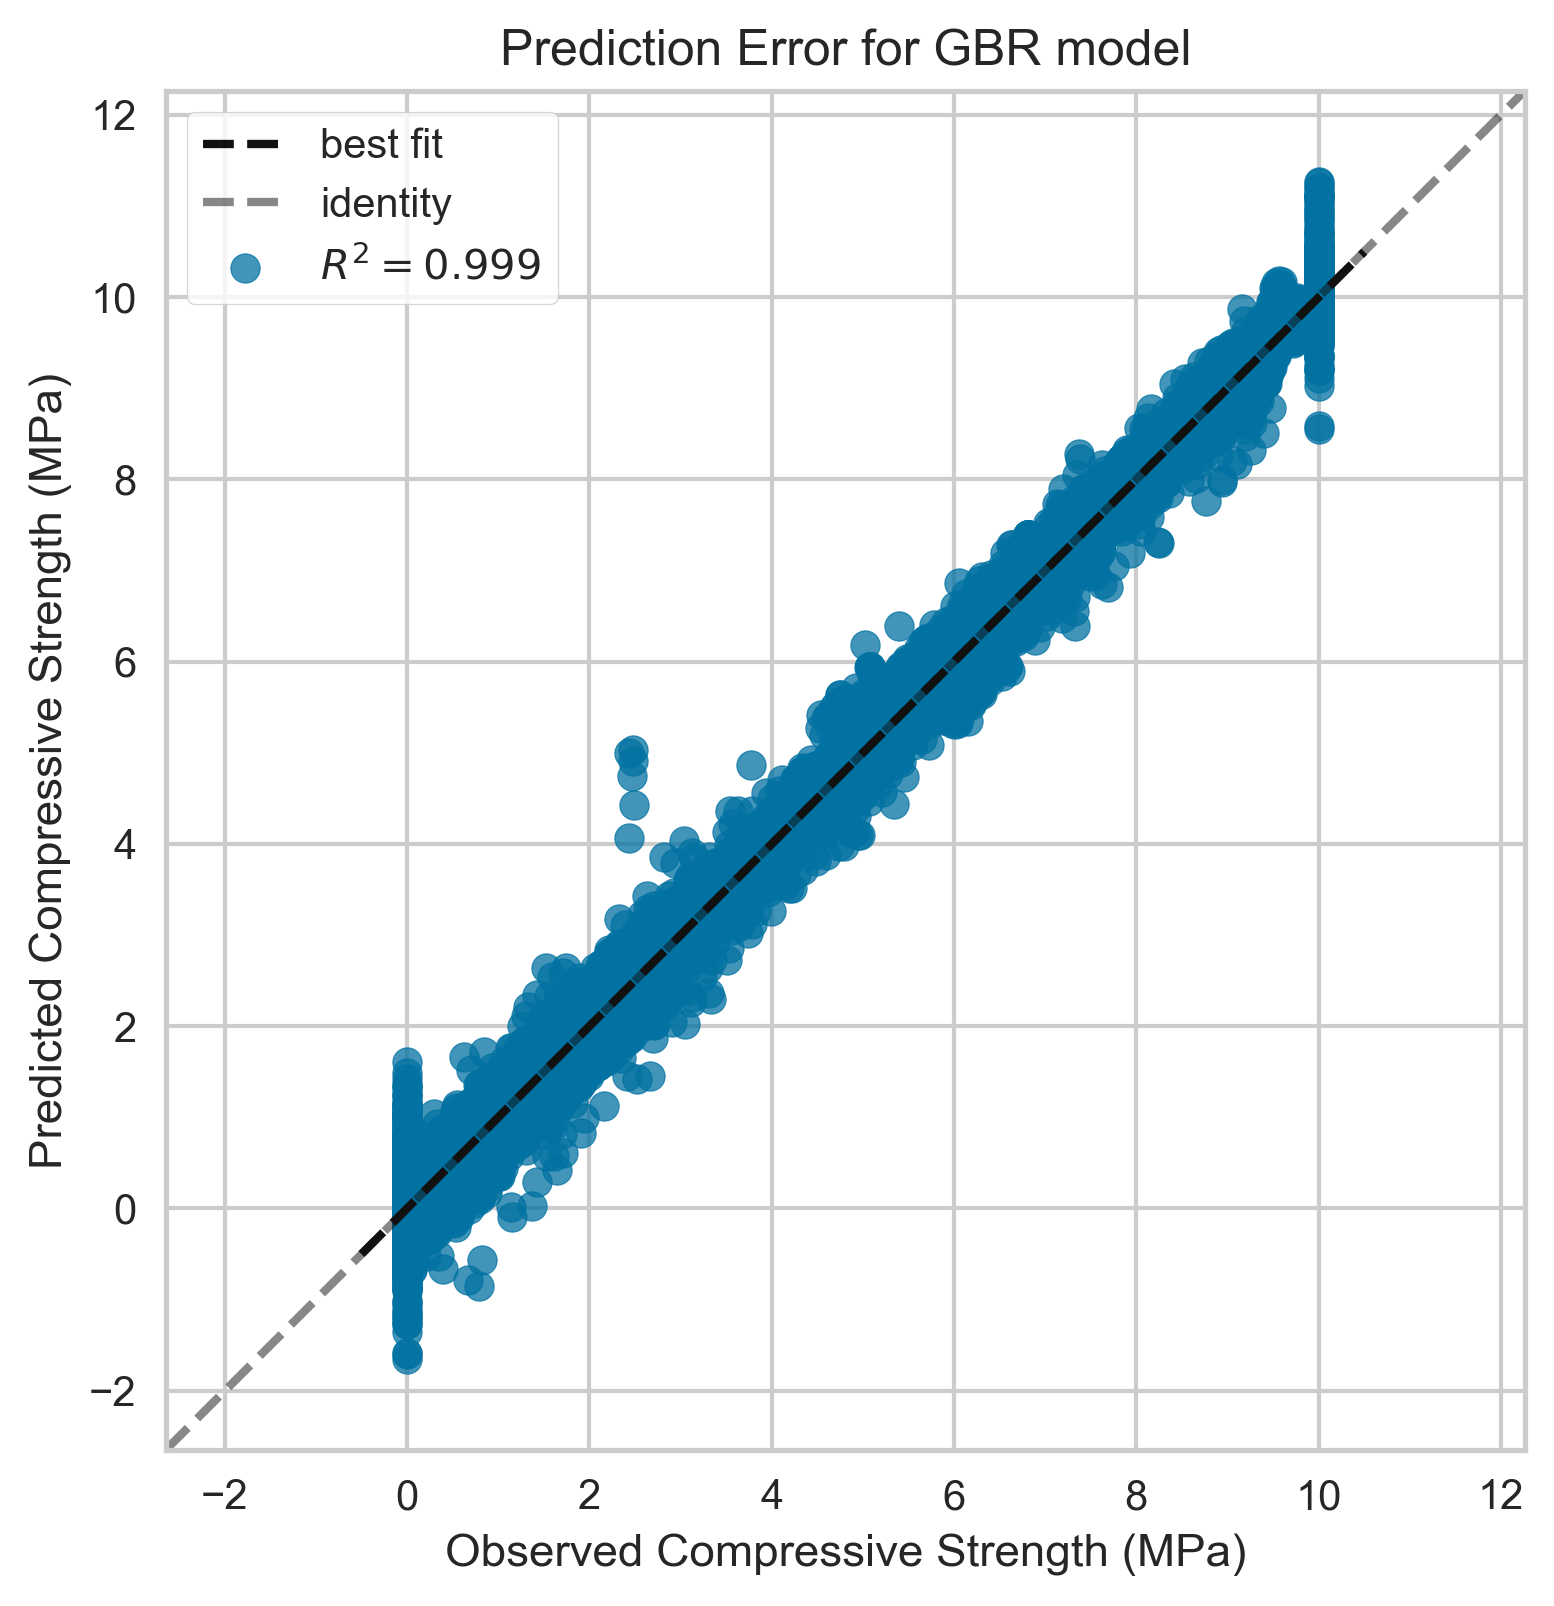

In [51]:
from yellowbrick.regressor import PredictionError

# Fit the visualizer
plt.rcParams[('figure.figsize')]=(9,6)
plt.rcParams[('figure.dpi')]=300
my_title="Prediction Error for GBR model"
model = PredictionError(gbr, title=my_title, alpha=0)
model.fit(X_train, y_train)
# model.score(X_train, y_train)
model.score(X_test, y_test)


# Call finalize to draw the final yellowbrick-specific elements
model.finalize(alpha=0.1)

# Get access to the axes object and modify labels
model.ax.set_xlabel("Observed Compressive Strength (MPa)")
model.ax.set_ylabel("Predicted Compressive Strength (MPa)")

# model.poof()